# Challenge (2/8): Datos abiertos del Instituto Nacional de Estadística y Geografía (INEGI)

¡Bien hecho, Dani! En el reto anterior aprendista mucho. Lograste:
1. Identificar una fuente de datos y consultarla.
2. Acceder a los datos descargados y hacer una breve exploración sobre ellos.
3. Formular algunas preguntas.
4. Planear cómo se verá tu dashboard.

Ahora nos toca comenzar a hacer algo de análisis exploratorio, comencemos con algunas gráficas para datos numéricos.

IMPORTANTE: Toma en cuenta las preguntas que planteaste en el reto anterior. Las variables numéricas involucradas en esas preguntas deberían ser exploradas en este reto con las gráficas propuestas.

## 1. Gráficas de distribución

Gráficas sugeridas:
- Histograma
- Distribución de densidad

Completa las siguientes tareas:
1. Selecciona las variables numéricas que consideres relevantes para tus preguntas del primer reto.
2. Construye una gráfica de distribución por cada una de ellas. Recuerda ajustar el número de "cortes" (bins) para observar mejor los valores relevantes en la distribución (solo histogramas).
3. Utiliza el atributo "hue" para que cada histograma represente alguna variable categórica de tu elección.
4. Utiliza el atributo "col" para generar subplots que representen subconjuntos de datos por categoría.

In [1]:
# Importación de librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Setting of style
sns.set_theme(context = 'notebook', style = 'darkgrid')

In [3]:
# Carga de datos desde Colab
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [4]:
# Carga del dataframe
%cd /content/drive/MyDrive/Colab Notebooks/conjunto_de_datos/
df = pd.read_csv('denue_inegi_54_.csv', encoding = 'ISO-8859-1') # Categoría de "Servicios profesionales, científicos y técnicos" (2022) del DENUE

# Para los campos de tipo fecha se convirtió el campo fecha_alta de object a date
df['fecha_alta'] = pd.to_datetime(df['fecha_alta'], errors = 'coerce', yearfirst=True, infer_datetime_format = True)

df.head()

/content/drive/MyDrive/Colab Notebooks/conjunto_de_datos


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,clee,nom_estab,raz_social,codigo_act,nombre_act,per_ocu,tipo_vial,nom_vial,tipo_v_e_1,...,localidad,ageb,manzana,telefono,correoelec,www,tipoUniEco,latitud,longitud,fecha_alta
0,8525230,01001541310000931000000000U2,11:11 ARQUITECOS,NaN,541310,Servicios de arquitectura,0 a 5 personas,CALLE,GENERAL MIGUEL BARRAGAN,PRIVADA,...,Aguascalientes,0549,21,4498041302.0,CHRISTIAN@1111ARQUITECTOS.COM,WWW.1111ARQUITECTOS.COM,Fijo,21.888813,-102.288903,2019-11-01
1,6905372,01001541510000971000000000U3,5TO COLOR,NaN,541510,Servicios de diseño de sistemas de cómputo y s...,0 a 5 personas,CALLE,MAR CARIBE,CALLE,...,Aguascalientes,2009,18,NaN,5T0COLORESTUDIO@GMAIL.COM,NaN,Fijo,21.898620,-102.313587,2019-11-01
2,6142345,01001236113000073010000000U1,9.15 ARQUITECTOS,NaN,541310,Servicios de arquitectura,11 a 30 personas,CALLE,SIERRA DEL HUMO,AVENIDA,...,Aguascalientes,2259,8,4491290879.0,GERENCIA@9.15ARQ.MX,WWW.915ARQ.MX,Fijo,21.913782,-102.312156,2010-07-01
3,37160,01001541110003931000000000U3,A&A DESPACHO JURIDICO,NaN,541110,Bufetes jurídicos,0 a 5 personas,CALLE,CHICHIMECO,AVENIDA,...,Aguascalientes,0816,43,NaN,ARIASGO@HOTMAIL.COM,NaN,Fijo,21.877087,-102.280368,2014-12-01
4,10599,01001541910000031001000000U8,AB MKT,AB MERCADOTECNIA SC,541910,Servicios de investigación de mercados y encue...,6 a 10 personas,BOULEVARD,LUIS DONALDO COLOSIO,CALLE,...,Aguascalientes,2390,19,4499128611.0,NaN,WWW.ABMERCADOTECNIA.COM,Fijo,21.924182,-102.311750,2010-07-01


In [5]:
# Información de las columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107880 entries, 0 to 107879
Data columns (total 42 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id          107880 non-null  int64         
 1   clee        107880 non-null  object        
 2   nom_estab   107880 non-null  object        
 3   raz_social  30169 non-null   object        
 4   codigo_act  107880 non-null  int64         
 5   nombre_act  107880 non-null  object        
 6   per_ocu     107880 non-null  object        
 7   tipo_vial   107199 non-null  object        
 8   nom_vial    107878 non-null  object        
 9   tipo_v_e_1  107321 non-null  object        
 10  nom_v_e_1   107687 non-null  object        
 11  tipo_v_e_2  107319 non-null  object        
 12  nom_v_e_2   107682 non-null  object        
 13  tipo_v_e_3  107323 non-null  object        
 14  nom_v_e_3   107634 non-null  object        
 15  numero_ext  92941 non-null   float64       
 16  le

Se crearán histogramas para el **número de personas empleadas** en las organizaciones oferentes de **servicios profesionales, científicos y técnicos**.

Para ello, primero se limpiarán los datos de la columna *per_ocu* del dataset.

In [6]:
# Limpieza de la columna per_ocu
df['per_ocu'] = df['per_ocu'].map(lambda x: x.replace(' a ', '-').replace(' personas', ''))

In [7]:
# Set de los rangos de personas ocupadas
set(df['per_ocu'])

{'0-5', '101-250', '11-30', '251 y más', '31-50', '51-100', '6-10'}

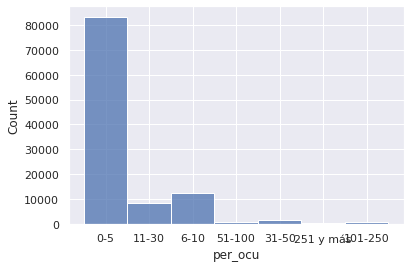

In [8]:
# Histograma
order = ['0-5', '6-10', '11-30', '31-50', '51-100', '101-250', '251 y más']
sns.histplot(data = df, x = 'per_ocu')

El histograma anterior no ha desplegado los bines en el orden correcto debido a que la variable *x* consiste de strings y no de números. Por lo que se procederá a convertir los rangos en números por medio del promedio de sus respectivos intervalos.

In [9]:
# Función para convertir los rangos de personas empleadas en números enteros
def cleaner(x):
  r = list()
  if x == '251 y más':
    r.append(251)
  else:
    x = x.split('-')
    for i in x:
      r.append(int(i))
  
  return r

In [10]:
# Creación de una nueva columna con los promedios de los rangos de personas empleadas
df['per_ocu_int'] = df['per_ocu'].apply(lambda x: np.mean(cleaner(x)))
df['per_ocu_int'].head()

0     2.5
1     2.5
2    20.5
3     2.5
4     8.0
Name: per_ocu_int, dtype: float64

In [11]:
# Clasificacion de actividades por el INEGI
df['nombre_act'].value_counts()

Bufetes jurídicos                                                                                                                                         23759
Servicios de contabilidad y auditoría                                                                                                                     17236
Servicios veterinarios para mascotas prestados por el sector privado                                                                                      12025
Servicios de fotografía y videograbación                                                                                                                  11192
Servicios de consultoría en administración                                                                                                                 6208
Agencias de publicidad                                                                                                                                     4304
Diseño gráfico                          

En el presente estudio, se empleará la categoría **_"Servicios de diseño de sistemas de cómputo y servicios relacionados"_** del INEGI para efectuar algunos análisis posteriores debido a que es la más cercana a lo que se desea evaluar, que son las organizaciones oferentes de servicios en tecnologías de la información.

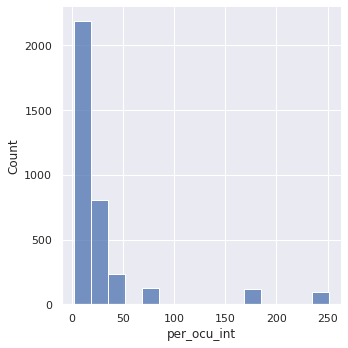

In [12]:
# Histograma del número de personas ocupadas en las organizaciones oferentes de Servicios de diseño de sistemas de cómputo y servicios relacionados
sns.displot(data = df[df['nombre_act'] == 'Servicios de diseño de sistemas de cómputo y servicios relacionados'], x = 'per_ocu_int', bins = 15)

Se observa del histograma anterior que la mayoría de las organizaciones tiene menos de 50 empleados.

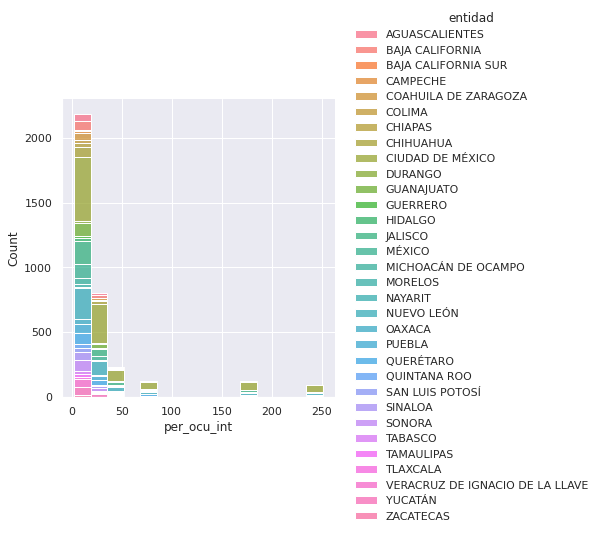

In [13]:
# Histograma apilado del número de personas ocupadas en las organizaciones oferentes de servicios de diseño de sistemas de cómputo y servicios relacionados por Estado 
sns.displot(data = df[df['nombre_act'] == 'Servicios de diseño de sistemas de cómputo y servicios relacionados'], 
            x = 'per_ocu_int', bins = 15, hue = 'entidad',  multiple="stack")

Del histograma anterior se observa que la Ciudad de México es la entidad federativa en donde más se concentran las organizaciones oferentes de servicios de diseño de sistemas de cómputo y servicios relacionados.

Además, la Ciudad de México es la entidad en donde se encuentran las organizaciones más grandes, que emplean a un mayor número de personas.

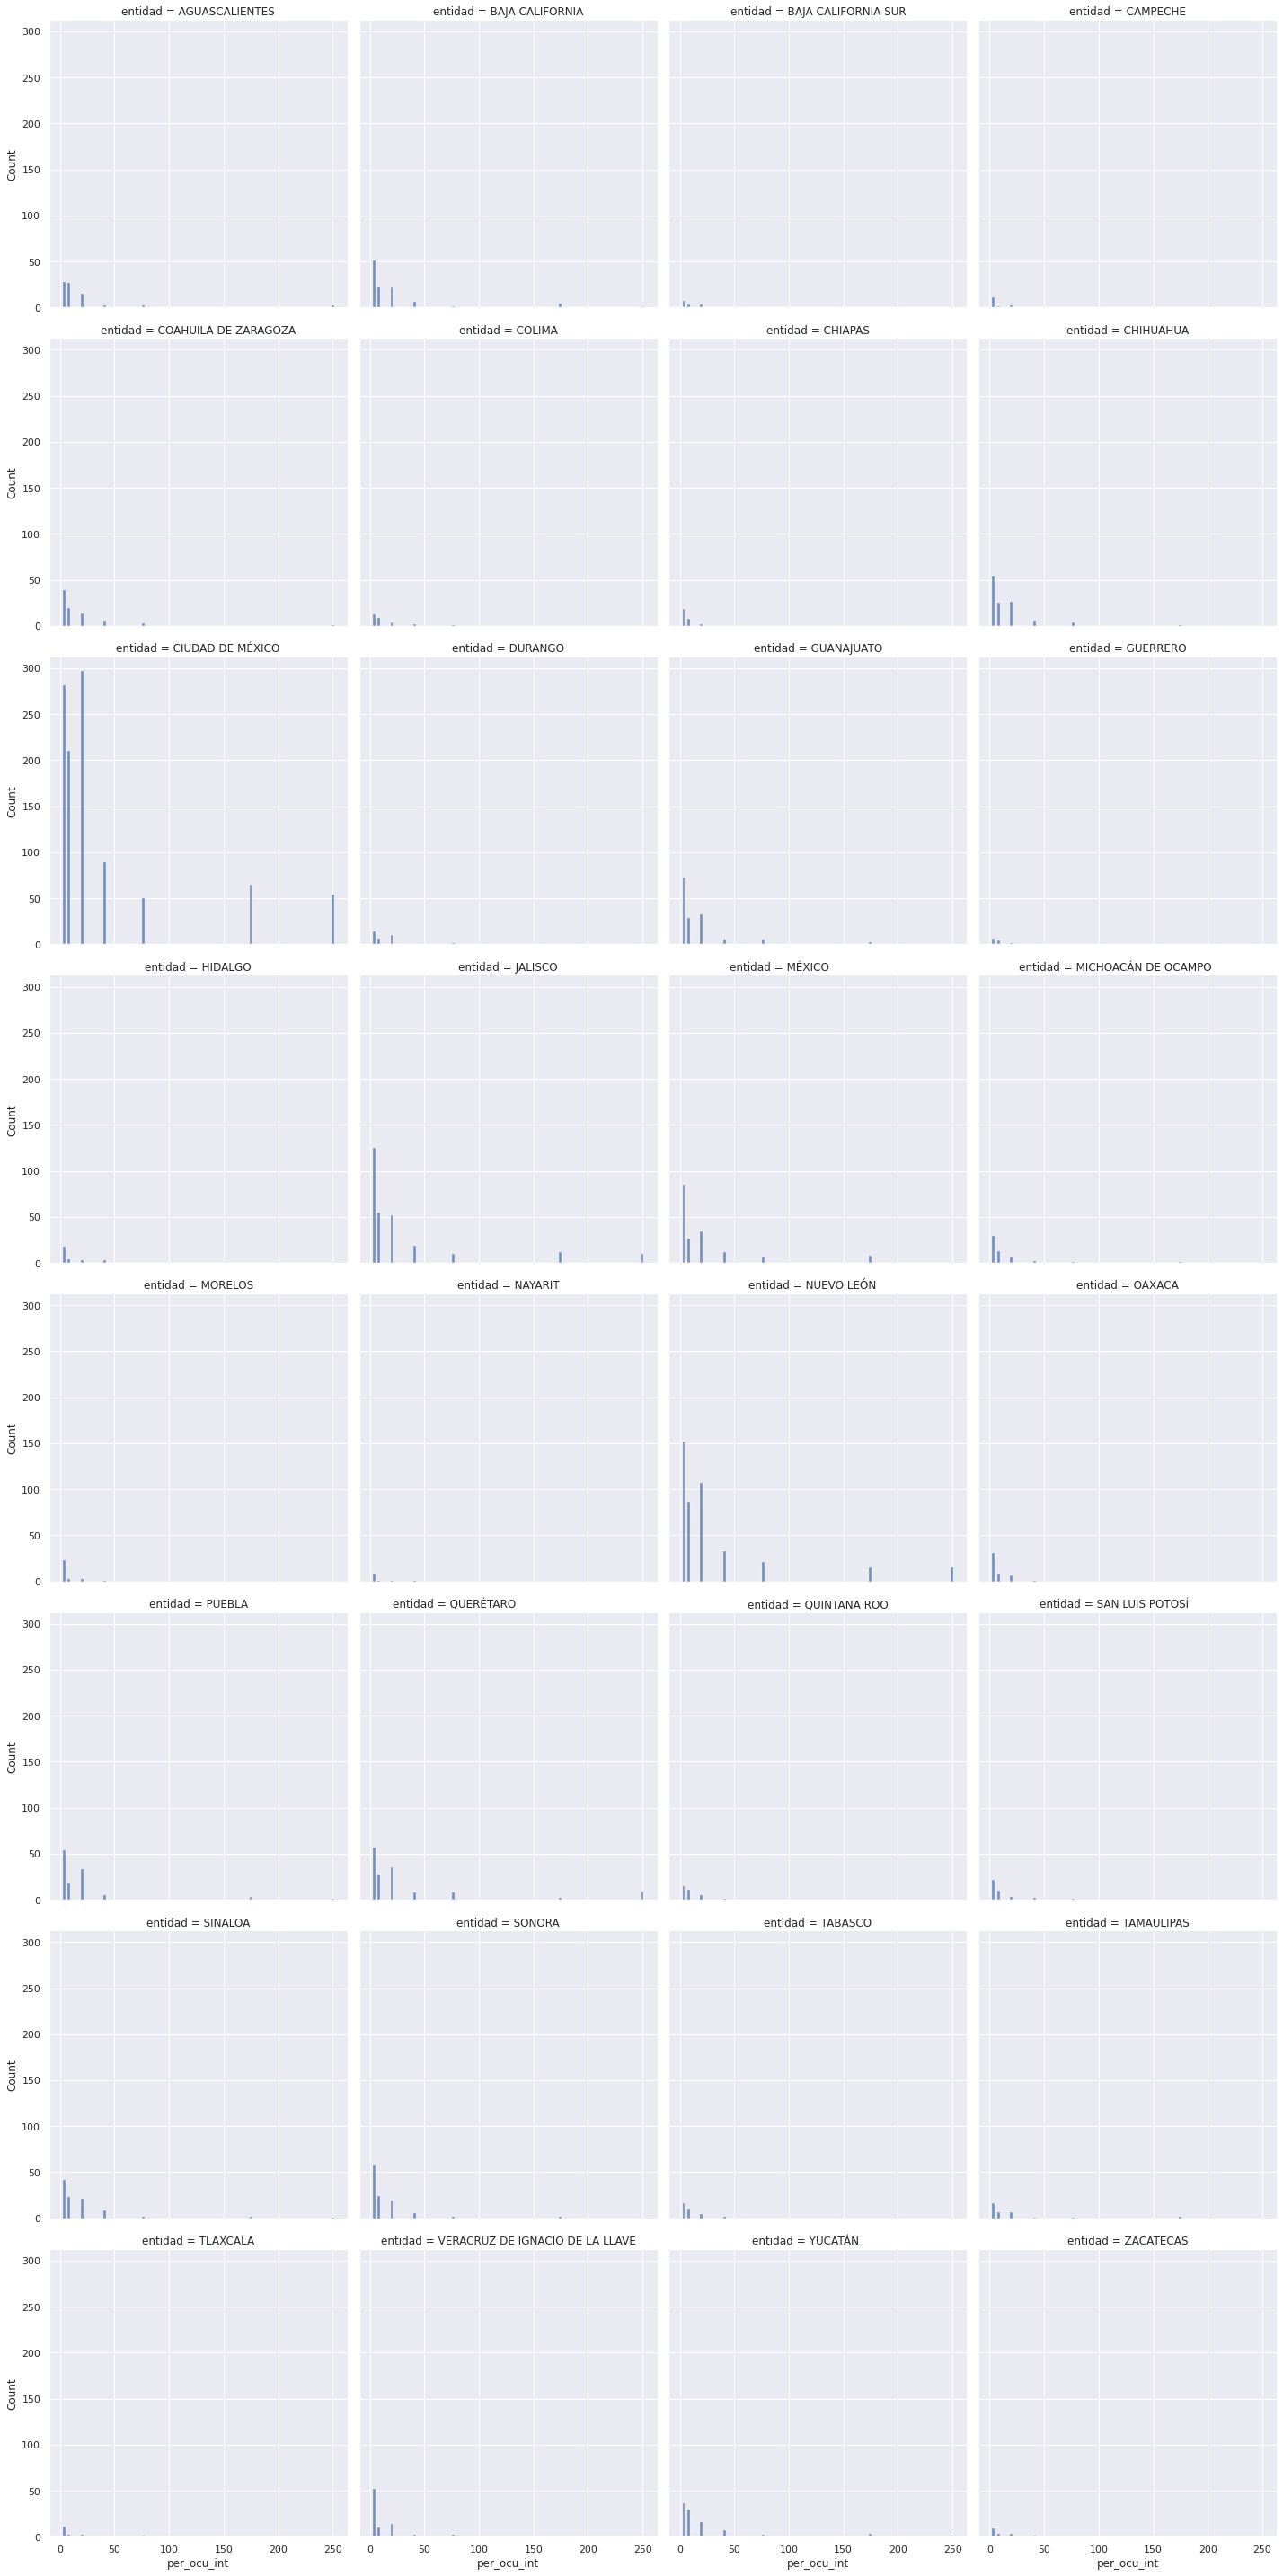

In [14]:
# Histogramas del número de personas ocupadas en las organizaciones oferentes de servicios de diseño de sistemas de cómputo y servicios relacionados por Estado 
sns.displot(data = df[df['nombre_act'] == 'Servicios de diseño de sistemas de cómputo y servicios relacionados'],
            x = 'per_ocu_int', col = 'entidad', col_wrap = 4)

Del conjunto de histogramas anterior se puede concluir que en la inmensa mayoría de las entidades federativas del país, las unidades oferentes de servicios de diseño de sistemas de cómputo y servicios relacionados son organizaciones muy pequeñas (MiPyMEs) que sólo cuentan con 1 a 5 empleados. 

## 2. Gráficas de dispersión

- Scatter plot
- Pairplot
- Displot en su modalidad tipo heatmap

In [149]:
# Dataset con el número de organizaciones y promedio de personas ocupadas por tipo de actividad
df_scatter_act = df.groupby(by = 'nombre_act', as_index = False).agg(count=('per_ocu_int', 'count'), mean_per_ocu=('per_ocu_int', 'mean')).\
                  sort_values(by = 'count', ascending = False)

df_scatter_act.head()

,nombre_act,count,mean_per_ocu
6,Bufetes jurídicos,23759,4.219938
22,Servicios de contabilidad y auditoría,17236,7.298445
39,Servicios veterinarios para mascotas prestados...,12025,3.047526
26,Servicios de fotografía y videograbación,11192,2.766708
20,Servicios de consultoría en administración,6208,22.452239


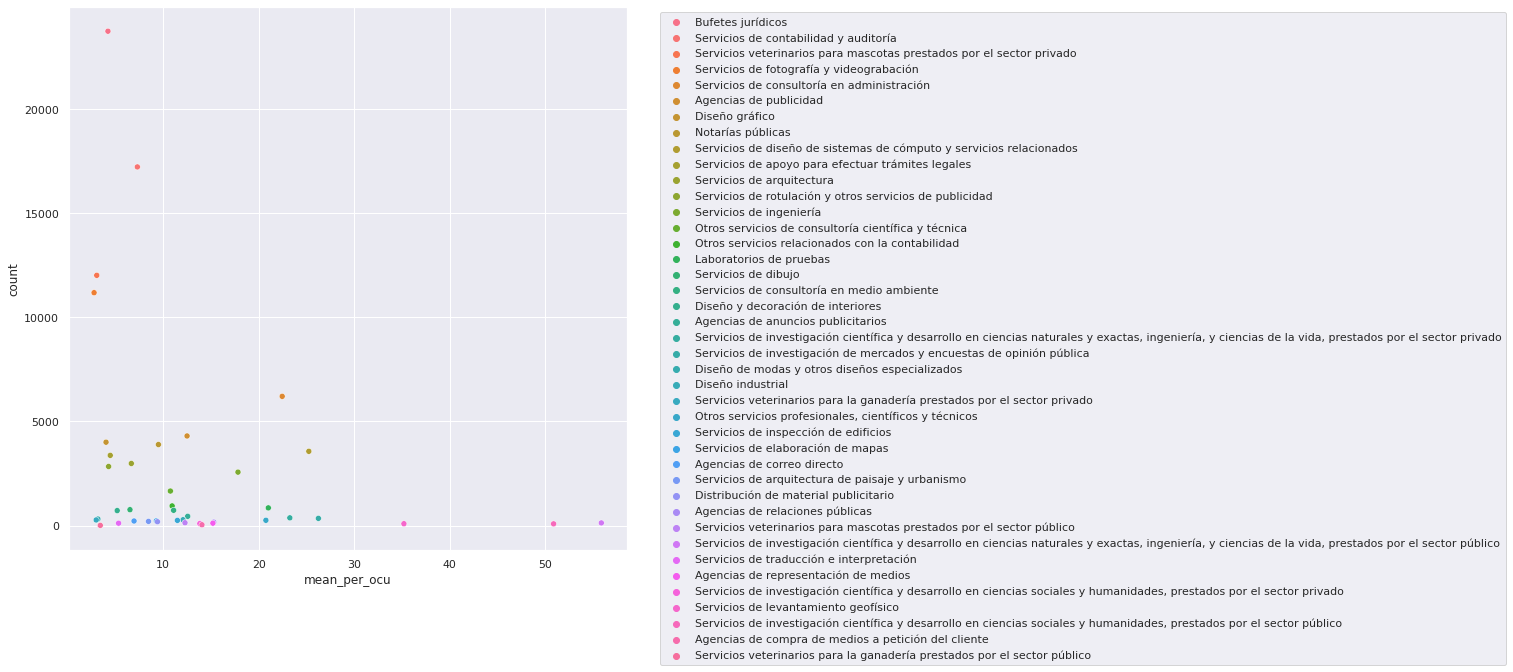

In [150]:
# Gráfica de dispersión del número de organizaciones vs. promedio de personas ocupadas por tipo de actividad
fig = plt.subplots(figsize = (10,10))
sns.scatterplot(data = df_scatter_act,
                x = 'mean_per_ocu',
                y = 'count',
                hue = 'nombre_act'
                )
plt.legend(loc = 'best', bbox_to_anchor=(1.05, 1))

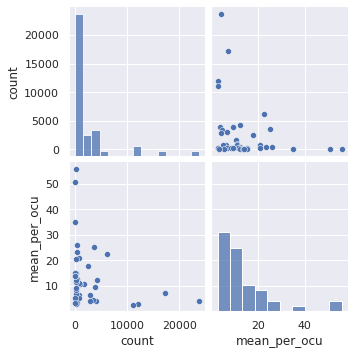

In [171]:
# Pairplot del número de organizaciones vs. promedio de personas ocupadas por tipo de actividad
sns.pairplot(data = df_scatter_act,
                )

El gráfico de dispersión y el pairplot anteriores sugieren que no hay correlación entre el número de organizaciones y el número de empleados ocupados por tipo de actividad.

In [169]:
# Dataset con el número de organizaciones y promedio de personas ocupadas por entidad
df_scatter_entidad = df.groupby(by = 'entidad', as_index = False).agg(count=('per_ocu_int', 'count'), mean_per_ocu=('per_ocu_int', 'mean')).\
                      sort_values(by='count', ascending = False)

df_scatter_entidad.head()

,entidad,count,mean_per_ocu
6,CIUDAD DE MÉXICO,14374,17.710693
16,MÉXICO,10317,5.493360
13,JALISCO,8101,8.418405
10,GUANAJUATO,5496,5.250273
20,PUEBLA,5377,6.024084


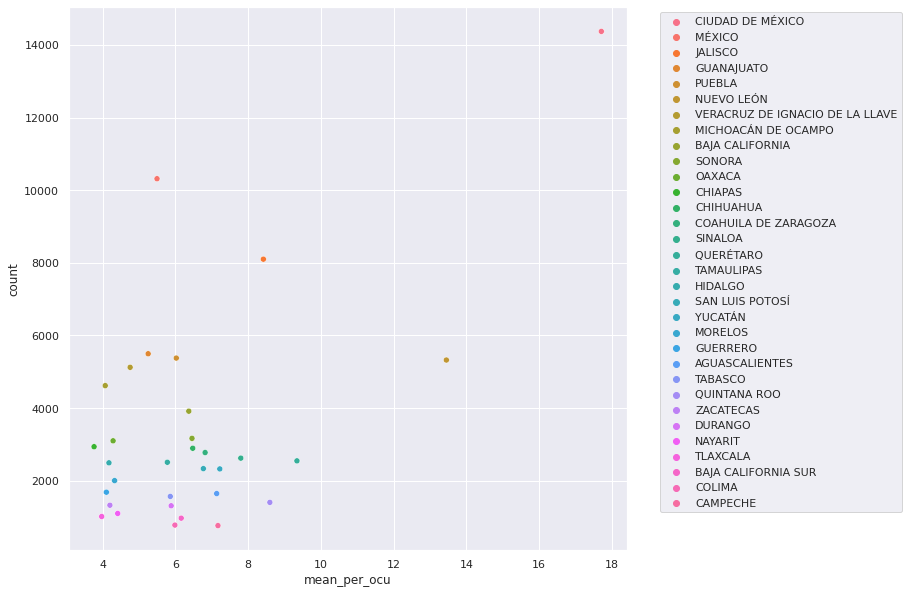

In [148]:
# Gráfica de dispersión con el número de organizaciones vs. promedio de personas ocupadas por entidad
fig = plt.subplots(figsize = (10,10))
sns.scatterplot(data = df_scatter_entidad,
                x = 'mean_per_ocu',
                y = 'count',
                hue = 'entidad',
                #palette = 'mako'
                )
plt.legend(loc = 'best', bbox_to_anchor=(1.05, 1))

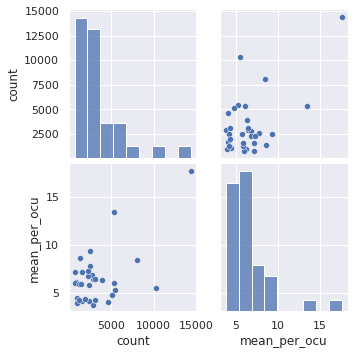

In [131]:
# Pairplot con el número de organizaciones vs. promedio de personas ocupadas por entidad
sns.pairplot(data = df_scatter_entidad,
                )

El gráfico de dispersión y el pairplot anteriores sugieren una leve correlación entre el número de organizaciones y el número de empleados ocupados por entidad. En particular, la Ciudad de México, el Estado de México, Jalisco y Nuevo León exhiben una alta correlación entre ambas variables, lo que indica que existen muchas organizaciones oferentes de servicios técnicos, científicos y profesionales en dichas entidades, y que esas tienen a ser más grandes y contar con más empleados.

In [114]:
# Dataset para construir un mapa de calor con el número de organizaciones por tipo de actividad y entidad
df_heatmap_count = pd.pivot_table(df[['nombre_act', 'entidad']], index = 'nombre_act', columns = 'entidad', aggfunc = 'size', fill_value = 0)
df_heatmap_count.index = df_heatmap_count.index.map(lambda x: x[:100])
df_heatmap_count.head()

entidad,AGUASCALIENTES,BAJA CALIFORNIA,BAJA CALIFORNIA SUR,CAMPECHE,CHIAPAS,CHIHUAHUA,CIUDAD DE MÉXICO,COAHUILA DE ZARAGOZA,COLIMA,DURANGO,...,QUINTANA ROO,SAN LUIS POTOSÍ,SINALOA,SONORA,TABASCO,TAMAULIPAS,TLAXCALA,VERACRUZ DE IGNACIO DE LA LLAVE,YUCATÁN,ZACATECAS
nombre_act,,,,,,,,,,,,,,,,,,,,,
Agencias de anuncios publicitarios,9,16,5,2,10,19,83,16,5,4,...,7,10,14,14,7,8,2,20,10,4
Agencias de compra de medios a petición del cliente,1,2,0,0,1,1,14,1,0,0,...,1,0,1,0,0,1,0,1,2,0
Agencias de correo directo,3,13,2,1,4,6,49,8,2,1,...,3,0,5,6,2,1,0,7,4,0
Agencias de publicidad,57,140,32,24,75,114,905,99,31,50,...,50,90,109,113,46,68,22,161,145,26
Agencias de relaciones públicas,1,3,1,2,1,5,66,5,0,1,...,2,3,2,4,0,0,0,6,3,0


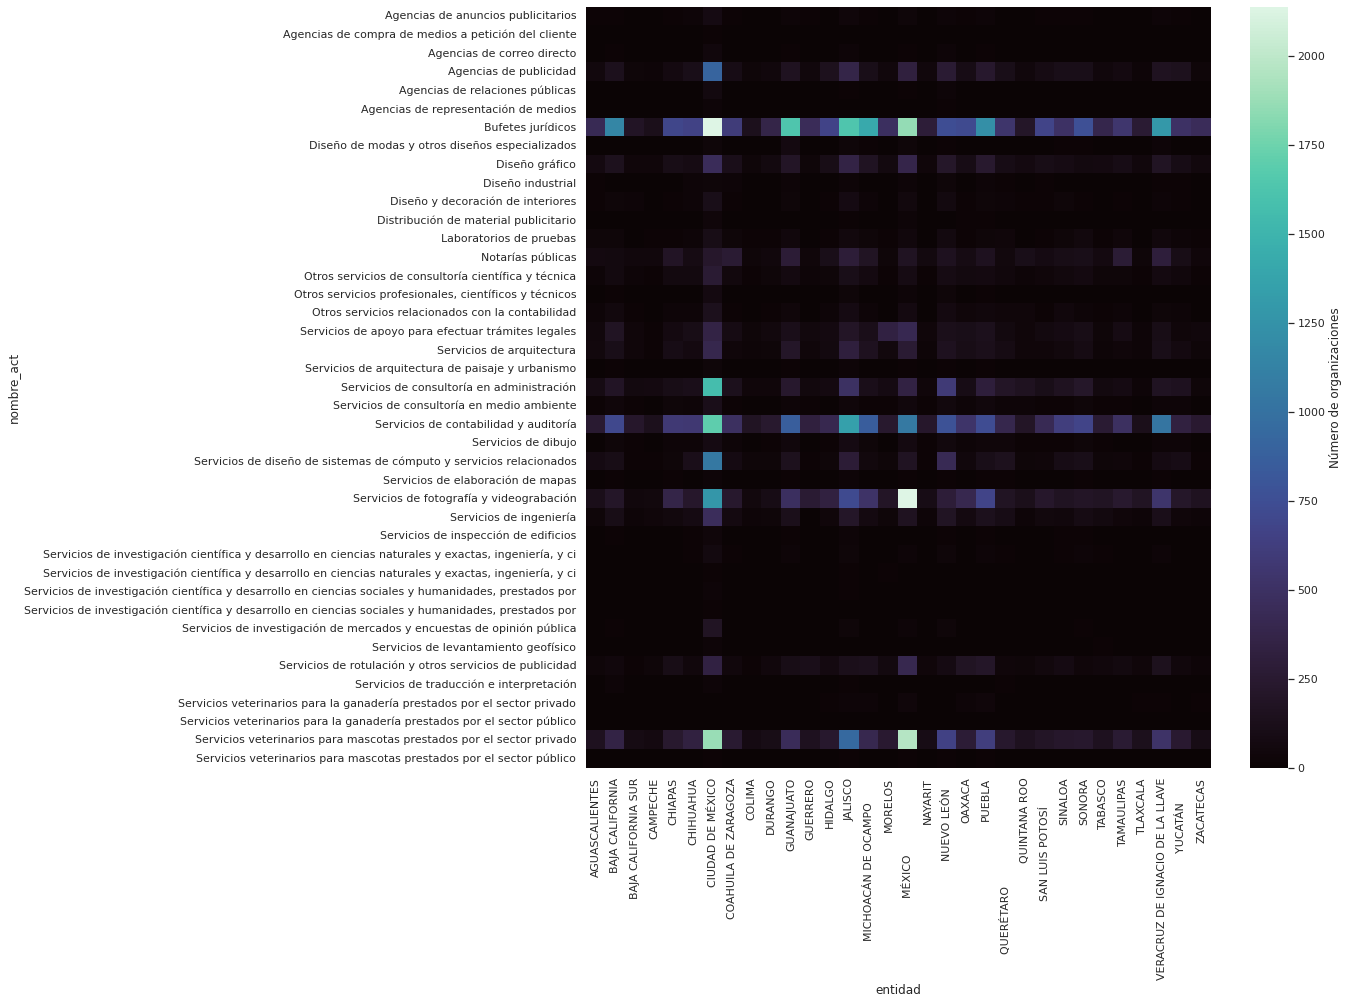

In [119]:
# Heatmap con el número de organizaciones por tipo de actividad y entidad
plt.subplots(figsize = (14,14))
sns.heatmap(data = df_heatmap_count,
            cmap = 'mako',
            cbar_kws={"label": "Número de organizaciones"})
plt.show()

El mapa de calor anterior muestra que los bufetes jurídicos y contables y los servicios veterinarios son los servicios profesionales y técnicos más comunes en el país. 

Por otro lado, se observa que los servicios profesionales y técnicos tienden a concentranrse de manera importante en Ciudad de México, Nuevo León y Jalisco.

In [121]:
# Dataset para construir un mapa de calor con el promedio de empleados por tipo de actividad y entidad
df_heatmap_ocu = pd.pivot_table(df[['nombre_act', 'entidad', 'per_ocu_int']], index = 'nombre_act', columns = 'entidad', values = 'per_ocu_int', aggfunc = 'mean', fill_value = 0)
df_heatmap_ocu.index = df_heatmap_ocu.index.map(lambda x: x[:120])
df_heatmap_ocu.head()

entidad,AGUASCALIENTES,BAJA CALIFORNIA,BAJA CALIFORNIA SUR,CAMPECHE,CHIAPAS,CHIHUAHUA,CIUDAD DE MÉXICO,COAHUILA DE ZARAGOZA,COLIMA,DURANGO,...,QUINTANA ROO,SAN LUIS POTOSÍ,SINALOA,SONORA,TABASCO,TAMAULIPAS,TLAXCALA,VERACRUZ DE IGNACIO DE LA LLAVE,YUCATÁN,ZACATECAS
nombre_act,,,,,,,,,,,,,,,,,,,,,
Agencias de anuncios publicitarios,2.500000,6.031250,3.600000,2.5000,3.60,8.315789,31.548193,8.156250,10.100000,9.75,...,4.071429,4.700000,10.750000,7.535714,5.642857,6.125000,2.50,4.85000,4.700000,2.500000
Agencias de compra de medios a petición del cliente,20.500000,2.500000,0.000000,0.0000,2.50,2.500000,25.500000,20.500000,0.000000,0.00,...,2.500000,0.000000,2.500000,0.000000,0.000000,8.000000,0.00,2.50000,5.250000,0.000000
Agencias de correo directo,2.500000,11.192308,11.500000,2.5000,2.50,6.416667,9.418367,5.437500,2.500000,2.50,...,4.333333,0.000000,8.300000,3.416667,2.500000,2.500000,0.00,2.50000,8.375000,0.000000
Agencias de publicidad,5.596491,10.053571,4.828125,4.6875,4.72,5.706140,27.009945,7.378788,4.725806,6.93,...,11.980000,6.511111,6.724771,7.000000,5.891304,8.551471,3.25,5.31677,7.700000,3.346154
Agencias de relaciones públicas,2.500000,8.500000,2.500000,2.5000,2.50,11.200000,24.037879,3.600000,0.000000,8.00,...,2.500000,10.333333,2.500000,8.375000,0.000000,0.000000,0.00,12.75000,32.833333,0.000000


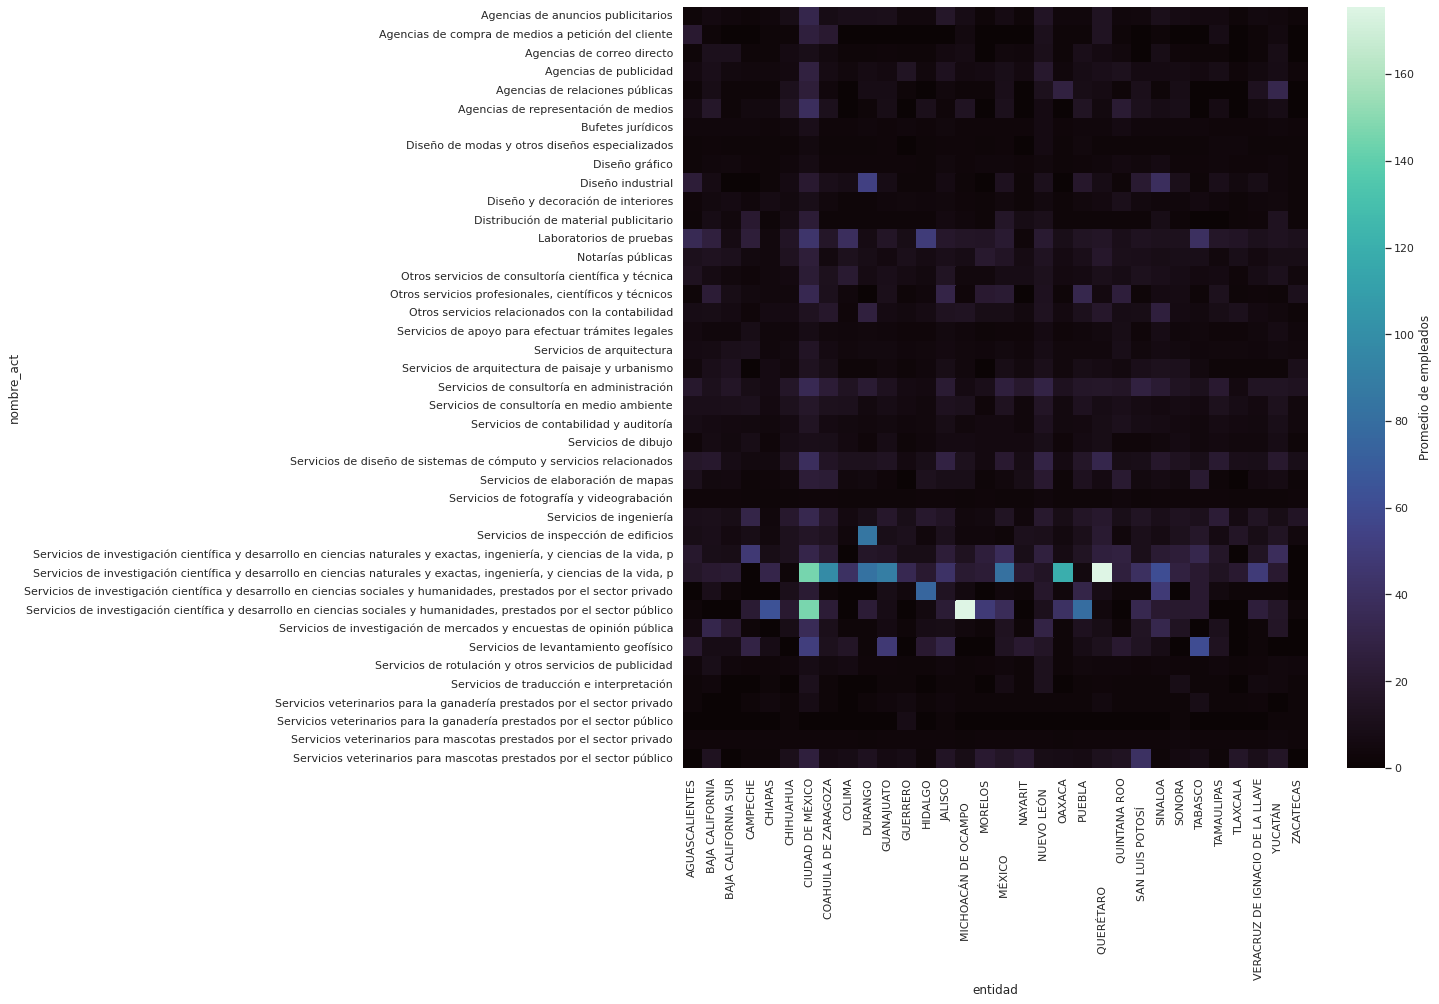

In [122]:
# Heatmap con el número promedio de empleados por tipo de actividad y entidad
plt.subplots(figsize = (14,14))
sns.heatmap(data = df_heatmap_ocu,
            cmap = 'mako',
            cbar_kws={"label": "Promedio de empleados"})
plt.show()

El mapa de calor anterior muestra que los servicios de investigación científica tanto en ciencias naturales como ciencias sociales son los tipos de actividades que exhiben un promedio más elevado de empleados.

Por otro lado, como era de esperarse, es posible encontrar un número más alto de promedio de empleados en las organizaciones de servicios profesionales y técnicos en Ciudad de México y Nuevo León.

## 3. Serie de tiempo

Una serie de tiempo no es más que el cambio de una variable numérica a través de una variable temporal. Ya que cuentas con ambas, construyamos una de estas series.

Completa las siguientes tareas:
- Construye una serie de tiempo haciendo uso de la columna de fechas de tu conjunto de datos y alguna de las variables numéricas de tu interés.
- Realiza tantas series como creas conveniente para responder tus preguntas y saciar tu curiosidad 😉

In [152]:
# Dataset para el gráfico de lineas por fecha de alta
serie = df.groupby(by= 'fecha_alta', as_index = False).agg(sum_ocu = ('per_ocu_int', 'sum'), mean_ocu = ('per_ocu_int', 'mean'), count = ('entidad','count')).\
        sort_values(by = 'fecha_alta')
serie.head()

,fecha_alta,sum_ocu,mean_ocu,count
0,2010-07-01,244778.0,7.626196,32097
1,2011-03-01,5230.5,17.435000,300
2,2012-06-01,14681.5,20.476290,717
3,2013-07-01,2213.5,7.849291,282
4,2014-12-01,121059.0,6.310086,19185


In [155]:
# Dataset para el gráfico de lineas por fecha de alta en formato tidy data
serie_tidy = pd.melt(serie, id_vars = 'fecha_alta', var_name = 'metric', value_name = 'value' ).sort_values(by = 'fecha_alta')
serie_tidy.head()

,fecha_alta,metric,value
0,2010-07-01,sum_ocu,244778.000000
18,2010-07-01,mean_ocu,7.626196
36,2010-07-01,count,32097.000000
1,2011-03-01,sum_ocu,5230.500000
19,2011-03-01,mean_ocu,17.435000


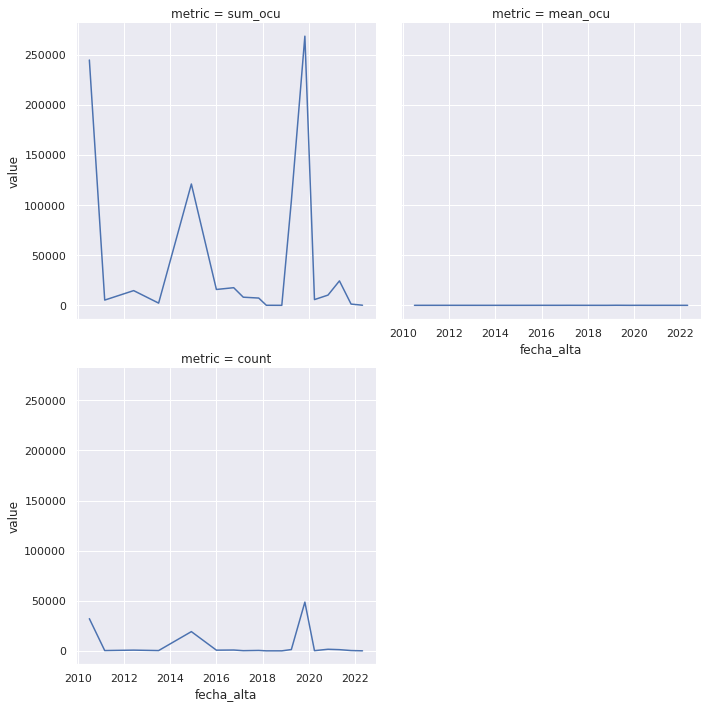

In [158]:
# Gráficos de líneas de la suma de personal ocupado, promedio de personal ocupado y conteo de organizaciones vs. fecha de alta
sns.relplot(data = serie_tidy, x = 'fecha_alta', y= 'value', kind= 'line', col = 'metric', col_wrap = 2)

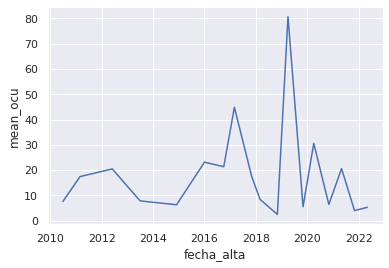

In [159]:
# Gráfico de línea del promedio de personal ocupado vs. fecha de alta
sns.lineplot(data = serie, x = 'fecha_alta', y= 'mean_ocu')

Los gráficos de líneas anteriores sugieren que en 2010 y en 2019 un gran número de organizaciones oferentes de servicios profesionales y técnicos fueron dadas de alta en el DENUE del INEGI. Por otro lado, también es posible observar que las organizaciones con un número de empleados mayor fueron dadas de alta en 2019.

In [160]:
# Dataset para el gráfico de lineas de servicios de diseño de sistemas de cómputo y servicios relacionados por fecha de alta
serie_comp = df[df['nombre_act'] == 'Servicios de diseño de sistemas de cómputo y servicios relacionados'].groupby(by= 'fecha_alta', as_index = False).\
              agg(sum_ocu = ('per_ocu_int', 'sum'), mean_ocu = ('per_ocu_int', 'mean'), count = ('entidad','count')).\
              sort_values(by = 'fecha_alta')
serie_comp.head()

,fecha_alta,sum_ocu,mean_ocu,count
0,2010-07-01,20912.5,35.686860,586
1,2011-03-01,635.0,31.750000,20
2,2012-06-01,2412.0,30.531646,79
3,2013-07-01,119.5,14.937500,8
4,2014-12-01,11020.0,21.821782,505


In [161]:
# Dataset para el gráfico de lineas de servicios de diseño de sistemas de cómputo y servicios relacionados por fecha de alta en formato tidy data
serie_comp_tidy = pd.melt(serie_comp, id_vars = 'fecha_alta', var_name = 'metric', value_name = 'value' ).sort_values(by = 'fecha_alta')
serie_comp_tidy.head()

,fecha_alta,metric,value
0,2010-07-01,sum_ocu,20912.50000
15,2010-07-01,mean_ocu,35.68686
30,2010-07-01,count,586.00000
1,2011-03-01,sum_ocu,635.00000
16,2011-03-01,mean_ocu,31.75000


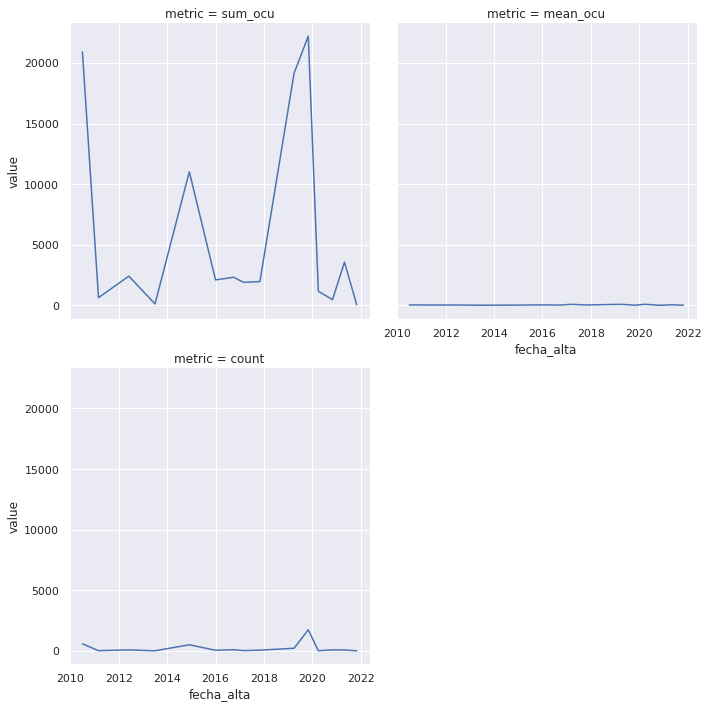

In [162]:
# Gráficos de líneas de la suma de personal ocupado, promedio de personal ocupado y conteo de organizaciones de servicios de diseño de sistemas de cómputo y servicios relacionados vs. fecha de alta
sns.relplot(data = serie_comp_tidy, x = 'fecha_alta', y= 'value', kind= 'line', col = 'metric', col_wrap = 2)

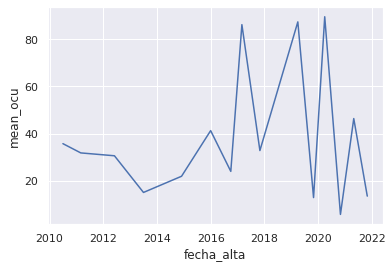

In [166]:
# Gráficos de líneas del promedio de personal ocupado de organizaciones de servicios de diseño de sistemas de cómputo y servicios relacionados vs. fecha de alta
sns.lineplot(data = serie_comp, x = 'fecha_alta', y= 'mean_ocu')

Los gráficos de líneas anteriores de igual manera sugieren que un gran número de organizaciones oferentes de servicios de diseño de sistemas de cómputo y servicios relacionados fueron dadas de alta en el DENUE del INEGI en 2010, 2015 y 2019, y que, en consecuencia, un gran número de personas ingresaron a trabajar en el sector de la tecnología en esos mismos años.

Por otro lado, también se advirtió una tendencia a que las organizaciones oferentes de servicios de diseño de sistemas de cómputo y servicios relacionados crezcan en el número promedio de empleados conforme el pasar de los años. Sin embargo, dicha tendencia se revirtió en los años de la pandemia 2020-2022.

In [ ]:
#End